c:\users\ola\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The `random_state` function is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the `random_statevector` function instead.
  # Remove the CWD from sys.path while we load stuff.


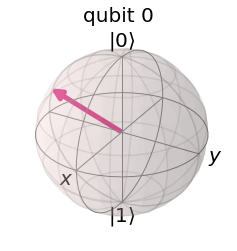

In [29]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.visualization import plot_bloch_multivector
from  qiskit.quantum_info import random_state

register = QuantumRegister(3)
a = ClassicalRegister(1)
b = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(register, a, b)

rand = random_state(2)
plot_bloch_multivector(rand)

In [30]:
from qiskit.extensions import Initialize

init_gate = Initialize(rand)
teleportation_circuit.append(init_gate, [0])
teleportation_circuit.draw()

┌───────────────────────────────────────────────────┐
q16_0: ┤ initialize(0.81225+-0.26038j,-0.056773+-0.51887j) ├
       └───────────────────────────────────────────────────┘
q16_1: ─────────────────────────────────────────────────────
                                                            
q16_2: ─────────────────────────────────────────────────────
                                                            
 c8_0: ═════════════════════════════════════════════════════
                                                            
 c9_0: ═════════════════════════════════════════════════════

In [31]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)
    
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw()

┌───────────────────────────────────────────────────┐     
q16_0: ┤ initialize(0.81225+-0.26038j,-0.056773+-0.51887j) ├─────
       └───────────────────────┬───┬───────────────────────┘     
q16_1: ────────────────────────┤ H ├──────────────────────────■──
                               └───┘                        ┌─┴─┐
q16_2: ─────────────────────────────────────────────────────┤ X ├
                                                            └───┘
 c8_0: ══════════════════════════════════════════════════════════
                                                                 
 c9_0: ══════════════════════════════════════════════════════════

In [32]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

teleportation_circuit.barrier()

alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

┌───────────────────────────────────────────────────┐      ░      ┌───┐
q16_0: ┤ initialize(0.81225+-0.26038j,-0.056773+-0.51887j) ├──────░───■──┤ H ├
       └───────────────────────┬───┬───────────────────────┘      ░ ┌─┴─┐└───┘
q16_1: ────────────────────────┤ H ├──────────────────────────■───░─┤ X ├─────
                               └───┘                        ┌─┴─┐ ░ └───┘     
q16_2: ─────────────────────────────────────────────────────┤ X ├─░───────────
                                                            └───┘ ░           
 c8_0: ═══════════════════════════════════════════════════════════════════════
                                                                              
 c9_0: ═══════════════════════════════════════════════════════════════════════

In [33]:
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
    
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw()

┌───────────────────────────────────────────────────┐      ░      ┌───┐»
q16_0: ┤ initialize(0.81225+-0.26038j,-0.056773+-0.51887j) ├──────░───■──┤ H ├»
       └───────────────────────┬───┬───────────────────────┘      ░ ┌─┴─┐└───┘»
q16_1: ────────────────────────┤ H ├──────────────────────────■───░─┤ X ├─────»
                               └───┘                        ┌─┴─┐ ░ └───┘     »
q16_2: ─────────────────────────────────────────────────────┤ X ├─░───────────»
                                                            └───┘ ░           »
 c8_0: ═══════════════════════════════════════════════════════════════════════»
                                                                              »
 c9_0: ═══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ░ ┌─┐   
«q16_0: ─░─┤M├───
«        ░ └╥┘┌─┐
«q16_1: ─░──╫─┤M├
«        ░  ║ └╥┘
«q16_2: ─░──╫──╫─
«        ░  ║  ║ 
« c8_0: ════╩══╬═
«              ║ 
« c9_0: ═══════╩═
«

In [34]:
def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1) 
    qc.z(qubit).c_if(crz, 1)
    
teleportation_circuit.barrier()

bob_gates(teleportation_circuit, 2, a, b)
teleportation_circuit.draw()

┌───────────────────────────────────────────────────┐      ░      ┌───┐»
q16_0: ┤ initialize(0.81225+-0.26038j,-0.056773+-0.51887j) ├──────░───■──┤ H ├»
       └───────────────────────┬───┬───────────────────────┘      ░ ┌─┴─┐└───┘»
q16_1: ────────────────────────┤ H ├──────────────────────────■───░─┤ X ├─────»
                               └───┘                        ┌─┴─┐ ░ └───┘     »
q16_2: ─────────────────────────────────────────────────────┤ X ├─░───────────»
                                                            └───┘ ░           »
 c8_0: ═══════════════════════════════════════════════════════════════════════»
                                                                              »
 c9_0: ═══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ░ ┌─┐    ░               
«q16_0: ─░─┤M├────░───────────────
«        ░ └╥┘┌─┐ ░               
«q16_1: ─░──╫─┤M├─░───────────────
«        ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
«q16_2: ─░──╫──╫──░──┤ X ├──┤ Z ├─
«        ░  ║  ║  ░  └─┬─┘  └─┬─┘ 
«           ║  ║       │   ┌──┴──┐
« c8_0: ════╩══╬═══════╪═══╡ = 1 ╞
«              ║    ┌──┴──┐└─────┘
« c9_0: ═══════╩════╡ = 1 ╞═══════
«                   └─────┘

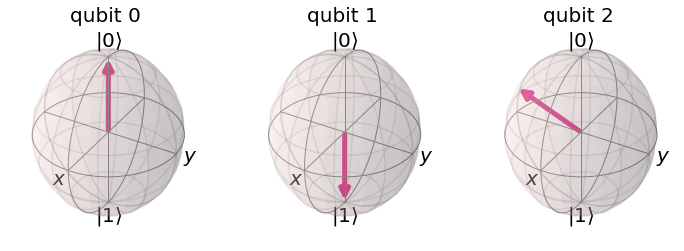

In [35]:
backend = BasicAer.get_backend('statevector_simulator')
result = execute(teleportation_circuit,backend).result().get_statevector()
plot_bloch_multivector(result)